In [8]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
data=pd.read_excel("Semi Conductor.xlsx")
print("Shape of Data", data.shape)
print(data.head())
print(data.columns)
print(data.dtypes)
print(data['Pass/Fail'].value_counts())
missing_counts=data.isnull().sum()
print(missing_counts.sort_values(ascending=False).head(10))
print(data.describe())
data.head

Shape of Data (1567, 592)
                 Time  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0 2008-07-19 11:55:00    3030.93    2564.00  2187.7333  1411.1265     1.3602   
1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222  1463.6606     0.8294   
2 2008-07-19 13:17:00    2932.61    2559.94  2186.4111  1698.0172     1.5102   
3 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   909.7926     1.3204   
4 2008-07-19 15:22:00    3032.24    2502.87  2233.3667  1326.5200     1.5334   

   Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  Feature 11  \
0      100.0    97.6133     0.1242     1.5005      0.0162     -0.0034   
1      100.0   102.3433     0.1247     1.4966     -0.0005     -0.0148   
2      100.0    95.4878     0.1241     1.4436      0.0041      0.0013   
3      100.0   104.2367     0.1217     1.4882     -0.0124     -0.0033   
4      100.0   100.3967     0.1235     1.5031     -0.0031     -0.0072   

   Feature 12  Feature 13  Feature 14  Feature 15  Fea

<bound method NDFrame.head of                     Time  Feature 1  Feature 2  Feature 3  Feature 4  \
0    2008-07-19 11:55:00    3030.93    2564.00  2187.7333  1411.1265   
1    2008-07-19 12:32:00    3095.78    2465.14  2230.4222  1463.6606   
2    2008-07-19 13:17:00    2932.61    2559.94  2186.4111  1698.0172   
3    2008-07-19 14:43:00    2988.72    2479.90  2199.0333   909.7926   
4    2008-07-19 15:22:00    3032.24    2502.87  2233.3667  1326.5200   
...                  ...        ...        ...        ...        ...   
1562 2008-10-16 15:13:00    2899.41    2464.36  2179.7333  3085.3781   
1563 2008-10-16 20:49:00    3052.31    2522.55  2198.5667  1124.6595   
1564 2008-10-17 05:26:00    2978.81    2379.78  2206.3000  1110.4967   
1565 2008-10-17 06:01:00    2894.92    2532.01  2177.0333  1183.7287   
1566 2008-10-17 06:07:00    2944.92    2450.76  2195.4444  2914.1792   

      Feature 5  Feature 6  Feature 7  Feature 8  Feature 9  Feature 10  \
0        1.3602      100.0    

In [11]:
for col in data.columns:
    print(repr(col))
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" ", "_")
print(data.columns)

'Time'
'Feature 1'
'Feature 2'
'Feature 3'
'Feature 4'
'Feature 5'
'Feature 6'
'Feature 7'
'Feature 8'
'Feature 9'
'Feature 10'
'Feature 11'
'Feature 12'
'Feature 13'
'Feature 14'
'Feature 15'
'Feature 16'
'Feature 17'
'Feature 18'
'Feature 19'
'Feature 20'
'Feature 21'
'Feature 22'
'Feature 23'
'Feature 24'
'Feature 25'
'Feature 26'
'Feature 27'
'Feature 28'
'Feature 29'
'Feature 30'
'Feature 31'
'Feature 32'
'Feature 33'
'Feature 34'
'Feature 35'
'Feature 36'
'Feature 37'
'Feature 38'
'Feature 39'
'Feature 40'
'Feature 41'
'Feature 42'
'Feature 43'
'Feature 44'
'Feature 45'
'Feature 46'
'Feature 47'
'Feature 48'
'Feature 49'
'Feature 50'
'Feature 51'
'Feature 52'
'Feature 53'
'Feature 54'
'Feature 55'
'Feature 56'
'Feature 57'
'Feature 58'
'Feature 59'
'Feature 60'
'Feature 61'
'Feature 62'
'Feature 63'
'Feature 64'
'Feature 65'
'Feature 66'
'Feature 67'
'Feature 68'
'Feature 69'
'Feature 70'
'Feature 71'
'Feature 72'
'Feature 73'
'Feature 74'
'Feature 75'
'Feature 76'
'Feature 77'
'

In [12]:
data = data.drop(columns=['Time'])
print("New shape:", data.shape)

New shape: (1567, 591)


In [13]:
data['Pass/Fail'] = data['Pass/Fail'].replace({-1: 1, 1: 0})


In [14]:
# Percentage of missing values per column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Sort descending
missing_sorted = missing_percentage.sort_values(ascending=False)

print(missing_sorted.head(20))

Feature_293    91.193363
Feature_294    91.193363
Feature_158    91.193363
Feature_159    91.193363
Feature_221    85.577537
Feature_359    85.577537
Feature_86     85.577537
Feature_493    85.577537
Feature_383    64.964901
Feature_385    64.964901
Feature_245    64.964901
Feature_112    64.964901
Feature_517    64.964901
Feature_518    64.964901
Feature_111    64.964901
Feature_247    64.964901
Feature_246    64.964901
Feature_384    64.964901
Feature_110    64.964901
Feature_519    64.964901
dtype: float64


In [15]:
# How many columns have ANY missing values?
print("Columns with missing values:", (missing_percentage > 0).sum())

# How many columns have more than 50% missing?
print("Columns with >50% missing:", (missing_percentage > 50).sum())


Columns with missing values: 538
Columns with >50% missing: 28


In [16]:
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]

print("Number of constant columns:", len(constant_columns))
print(constant_columns[:10])

Number of constant columns: 116
['Feature_6', 'Feature_14', 'Feature_43', 'Feature_50', 'Feature_53', 'Feature_70', 'Feature_98', 'Feature_142', 'Feature_150', 'Feature_179']


In [17]:
# Calculate missing percentage again
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns with >50% missing
high_missing_cols = missing_percentage[missing_percentage > 50].index

print("Columns to drop (high missing):", len(high_missing_cols))

# Drop them
data = data.drop(columns=high_missing_cols)

print("Shape after dropping high-missing columns:", data.shape)


Columns to drop (high missing): 28
Shape after dropping high-missing columns: (1567, 563)


In [18]:
constant_columns = [col for col in data.columns if data[col].nunique() <= 1]

print("Constant columns to drop:", len(constant_columns))

data = data.drop(columns=constant_columns)

print("Final shape after dropping constants:", data.shape)


Constant columns to drop: 116
Final shape after dropping constants: (1567, 447)


In [19]:
X = data.drop(columns=['Pass/Fail'])
y = data['Pass/Fail']


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns
)

print("Remaining missing values:", X_imputed.isnull().sum().sum())

Remaining missing values: 0


In [21]:
data_clean = X_imputed.copy()
data_clean['Pass/Fail'] = y.values

print("Cleaned dataset shape:", data_clean.shape)


Cleaned dataset shape: (1567, 447)


In [22]:
X = data_clean.drop(columns=['Pass/Fail'])
y = data_clean['Pass/Fail']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (1253, 446)
Test set shape: (314, 446)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


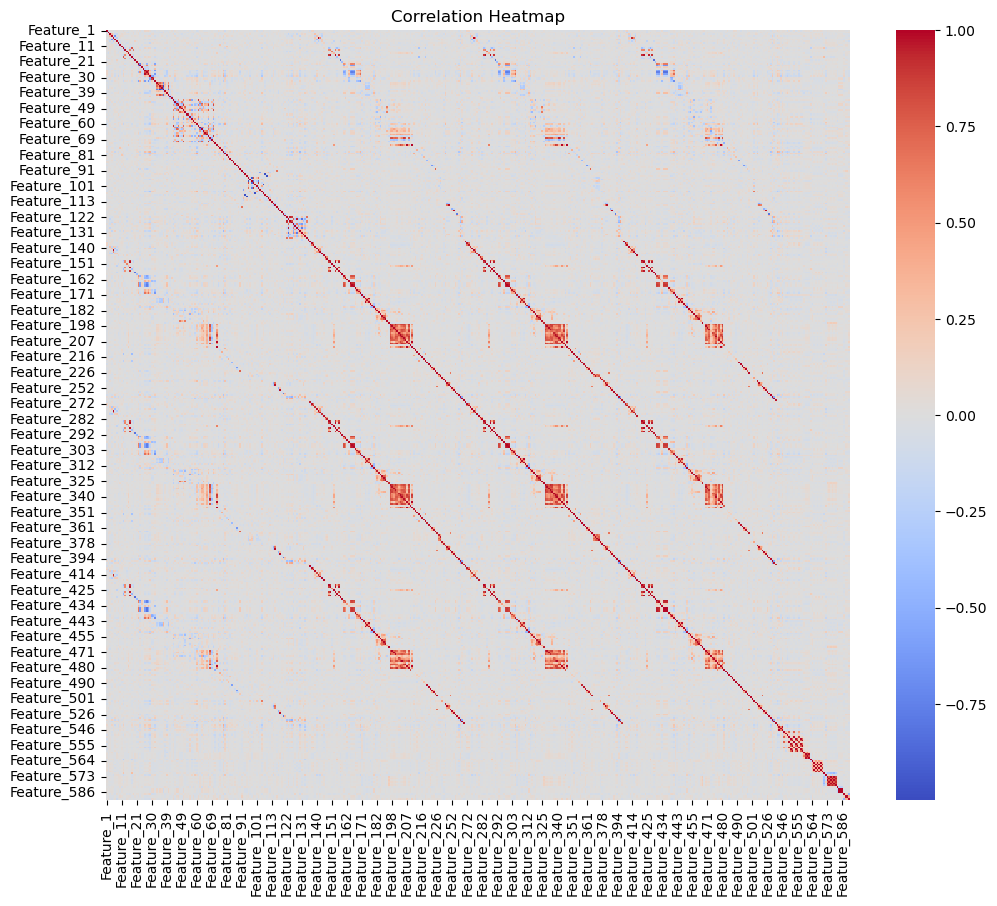

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = X_train_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [27]:
import numpy as np

# Absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Upper triangle
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Find columns with correlation > 0.90
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Highly correlated columns:", len(high_corr_cols))

Highly correlated columns: 194


In [28]:
X_train_scaled = X_train_scaled.drop(columns=high_corr_cols)
X_test_scaled = X_test_scaled.drop(columns=high_corr_cols)

print("New training shape:", X_train_scaled.shape)

New training shape: (1253, 252)


In [30]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)

X_train_var = selector.fit_transform(X_train_scaled)
X_test_var = selector.transform(X_test_scaled)

# Get kept feature names
kept_features = X_train_scaled.columns[selector.get_support()]

# Convert back to DataFrame
X_train_var = pd.DataFrame(X_train_var, columns=kept_features)
X_test_var = pd.DataFrame(X_test_var, columns=kept_features)

print("Shape after variance filtering:", X_train_var.shape)


Shape after variance filtering: (1253, 252)


In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=100)  # keep top 100 features

X_train_selected = selector.fit_transform(X_train_var, y_train)
X_test_selected = selector.transform(X_test_var)

# Get selected feature names
selected_features = X_train_var.columns[selector.get_support()]

X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

print("Final feature count:", X_train_selected.shape[1])


Final feature count: 100


In [32]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=5000)

model_lr.fit(X_train_selected, y_train)


LogisticRegression(max_iter=5000)

In [33]:
y_pred = model_lr.predict(X_test_selected)
y_proba = model_lr.predict_proba(X_test_selected)[:, 1]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9171974522292994
Precision: 0.9377049180327869
Recall: 0.9761092150170648
F1 Score: 0.9565217391304348
ROC AUC: 0.7103851779619699


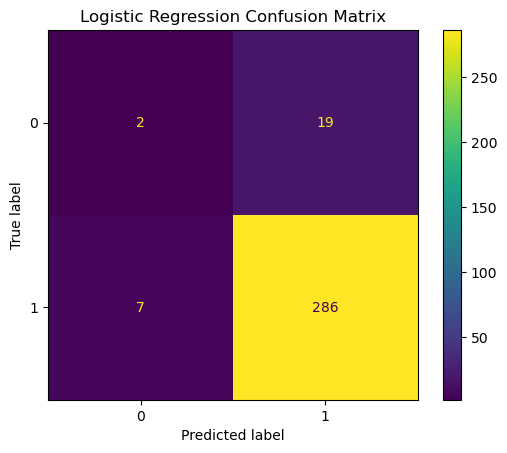

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [36]:
print(y_test.value_counts())


Pass/Fail
1    293
0     21
Name: count, dtype: int64


In [37]:
print(data_clean['Pass/Fail'].value_counts())


Pass/Fail
1    1463
0     104
Name: count, dtype: int64


In [41]:
!pip install xgboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
    --------------------------------------- 1.3/101.7 MB 4.4 MB/s eta 0:00:24
    --------------------------------------- 2.4/101.7 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 3.4/101.7 MB 4.8 MB/s eta 0:00:21
   - -------------------------------------- 5.0/101.7 MB 5.4 MB/s eta 0:00:19
   -- ------------------------------------- 6.6/101.7 MB 5.8 MB/s eta 0:00:17
   --- ------------------------------------ 7.9/101.7 MB 6.0 MB/s eta 0:00:16
   --- ------------------------------------ 9.4/101.7 MB 6.1 MB/s eta 0:00:16
   ---- ----------------------------------- 10.7/101.7 MB 6.3 MB/s eta 0:00:15
   ---- ----------------------------------- 11.3/101.7 MB 6.2 MB/s eta 0:00:15
   ----- ---------------------------------- 13.1/101.7 MB 6.2 MB/s eta 0:00:15
   ----- ---------------------------------- 14.9/101.7 MB 6.4 MB/s eta 0:00

In [44]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)


model_xgb.fit(X_train_selected, y_train)

y_pred_xgb = model_xgb.predict(X_test_selected)
y_proba_xgb = model_xgb.predict_proba(X_test_selected)[:, 1]


In [45]:
y_pred_xgb = model_xgb.predict(X_test_selected)


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.93      1.00      0.97       293

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 0.07094017094017094


In [48]:
model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

model_xgb.fit(X_train_selected, y_train)

y_pred_xgb = model_xgb.predict(X_test_selected)


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.50      0.14      0.22        21
           1       0.94      0.99      0.97       293

    accuracy                           0.93       314
   macro avg       0.72      0.57      0.59       314
weighted avg       0.91      0.93      0.92       314



In [51]:
y_proba = model_xgb.predict_proba(X_test_selected)[:, 1]


In [52]:
y_pred_custom = (y_proba > 0.3).astype(int)


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      0.10      0.17        21
           1       0.94      1.00      0.97       293

    accuracy                           0.94       314
   macro avg       0.97      0.55      0.57       314
weighted avg       0.94      0.94      0.92       314



In [54]:
!pip install imbalanced-learn


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

print("After SMOTE distribution:")
print(pd.Series(y_train_smote).value_counts())


After SMOTE distribution:
Pass/Fail
1    1170
0    1170
Name: count, dtype: int64


C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [56]:
print(pd.Series(y_train_smote).value_counts())


Pass/Fail
1    1170
0    1170
Name: count, dtype: int64


In [57]:
model_xgb.fit(X_train_smote, y_train_smote)
y_pred_smote = model_xgb.predict(X_test_selected)
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.16      0.24      0.19        21
           1       0.94      0.91      0.93       293

    accuracy                           0.86       314
   macro avg       0.55      0.57      0.56       314
weighted avg       0.89      0.86      0.88       314



In [58]:
y_proba_smote = model_xgb.predict_proba(X_test_selected)[:, 1]

y_pred_custom = (y_proba_smote > 0.4).astype(int)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.19      0.24      0.21        21
           1       0.94      0.93      0.94       293

    accuracy                           0.88       314
   macro avg       0.57      0.58      0.57       314
weighted avg       0.89      0.88      0.89       314



In [60]:
!pip install shap


   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 5.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [slicer]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



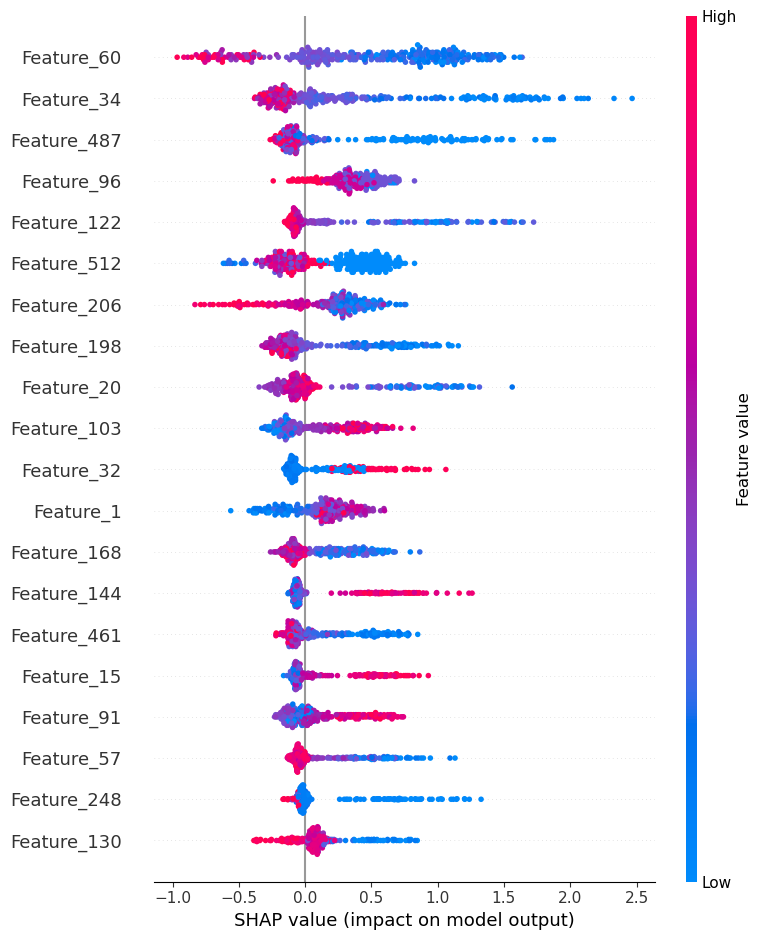

In [61]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_selected)

shap.summary_plot(shap_values, X_test_selected)

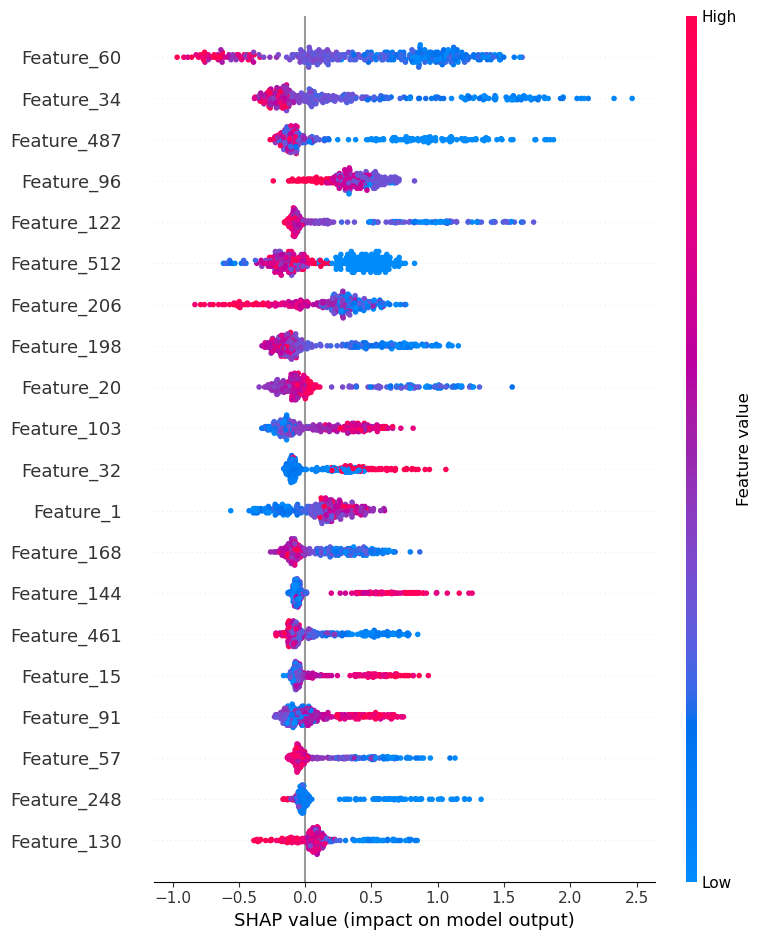

In [62]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_selected)

shap.summary_plot(shap_values, X_test_selected)

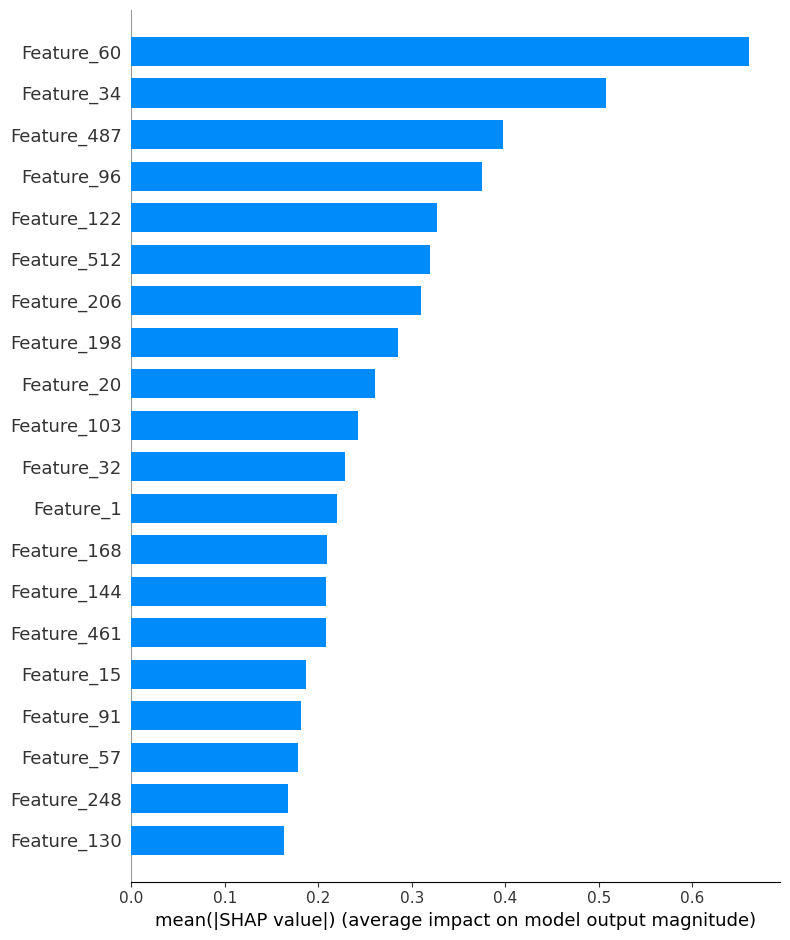

In [63]:
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

In [64]:
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values).mean(axis=0)

feature_importance = pd.DataFrame({
    'feature': X_test_selected.columns,
    'importance': mean_abs_shap
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

print(feature_importance.head(10))

        feature  importance
16   Feature_60    0.660832
10   Feature_34    0.507882
88  Feature_487    0.397971
31   Feature_96    0.374753
39  Feature_122    0.326423
90  Feature_512    0.319698
72  Feature_206    0.309806
66  Feature_198    0.285287
2    Feature_20    0.260181
34  Feature_103    0.242200


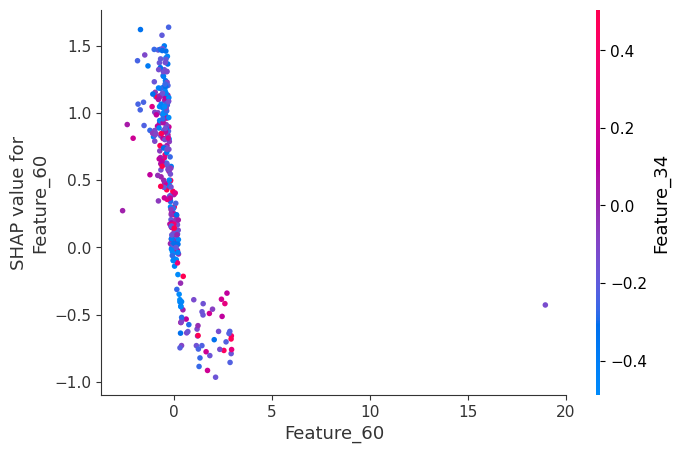

In [65]:
shap.dependence_plot("Feature_60", shap_values, X_test_selected)


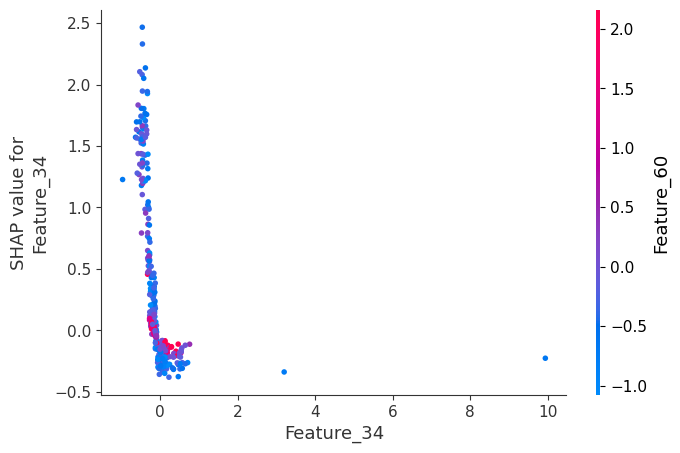

In [66]:
shap.dependence_plot("Feature_34", shap_values, X_test_selected)


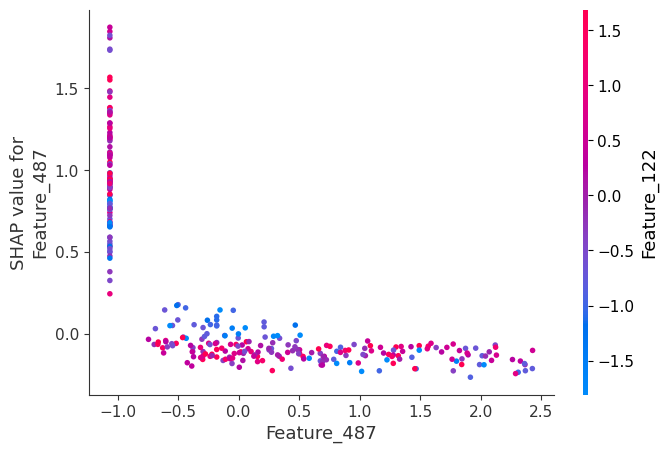

In [67]:
shap.dependence_plot("Feature_487", shap_values, X_test_selected)


In [68]:
print(model_xgb.classes_)


[0 1]


In [69]:
X_test_selected["Feature_60"].describe()


count    314.000000
mean      -0.047146
std        1.400922
min       -2.643827
25%       -0.560717
50%       -0.279465
75%        0.084015
max       18.957836
Name: Feature_60, dtype: float64

In [70]:
test_df = X_test_selected.copy()
test_df["Pass/Fail"] = y_test.values

print(test_df.groupby("Pass/Fail")["Feature_60"].mean())


Pass/Fail
0    0.569719
1   -0.091358
Name: Feature_60, dtype: float64


In [71]:
print(model_xgb.classes_)


[0 1]


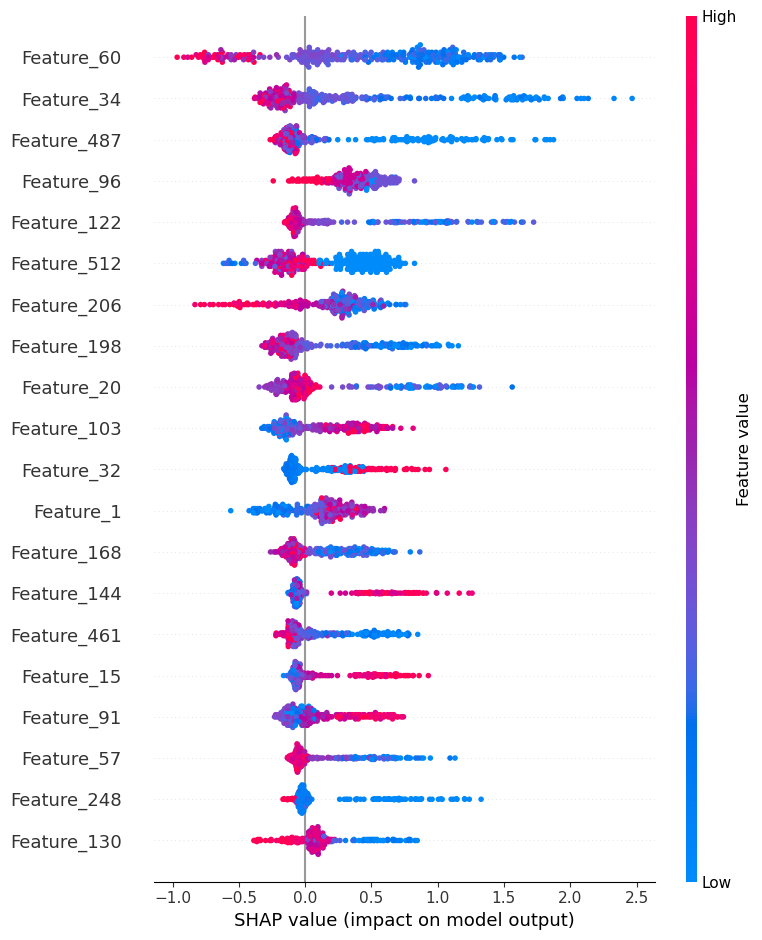

In [72]:
shap.summary_plot(shap_values, X_test_selected)


In [73]:
print(test_df.groupby("Pass/Fail")["Feature_34"].mean())


Pass/Fail
0   -0.044814
1   -0.076074
Name: Feature_34, dtype: float64


In [74]:
top5 = feature_importance.head(5)["feature"].tolist()
print(top5)


['Feature_60', 'Feature_34', 'Feature_487', 'Feature_96', 'Feature_122']


In [75]:
test_df = X_test_selected.copy()
test_df["Pass/Fail"] = y_test.values

for f in top5:
    print(f)
    print(test_df.groupby("Pass/Fail")[f].mean())
    print("------")


Feature_60
Pass/Fail
0    0.569719
1   -0.091358
Name: Feature_60, dtype: float64
------
Feature_34
Pass/Fail
0   -0.044814
1   -0.076074
Name: Feature_34, dtype: float64
------
Feature_487
Pass/Fail
0    0.000258
1    0.007626
Name: Feature_487, dtype: float64
------
Feature_96
Pass/Fail
0    0.289270
1   -0.019763
Name: Feature_96, dtype: float64
------
Feature_122
Pass/Fail
0    0.236960
1    0.004265
Name: Feature_122, dtype: float64
------


In [76]:
# Assumptions
cost_per_failed_wafer = 5000      # USD per failed wafer
monthly_production = 10000        # wafers per month
current_failure_rate = 104 / 1567 # from dataset


In [77]:
current_monthly_failures = monthly_production * current_failure_rate
current_monthly_loss = current_monthly_failures * cost_per_failed_wafer

print("Current Monthly Failures:", current_monthly_failures)
print("Current Monthly Loss ($):", current_monthly_loss)


Current Monthly Failures: 663.6885768985322
Current Monthly Loss ($): 3318442.8844926613


In [78]:
improvement_rate = 0.25

reduced_failures = current_monthly_failures * improvement_rate
monthly_savings = reduced_failures * cost_per_failed_wafer

print("Reduced Failures:", reduced_failures)
print("Monthly Savings ($):", monthly_savings)


Reduced Failures: 165.92214422463306
Monthly Savings ($): 829610.7211231653


In [79]:
cost_per_failed_wafer = 5000
monthly_production = 10000
current_failure_rate = 104 / 1567

current_monthly_failures = monthly_production * current_failure_rate
current_monthly_loss = current_monthly_failures * cost_per_failed_wafer


In [80]:
improvement_rates = [0.10, 0.20, 0.30]

results = []

for rate in improvement_rates:
    reduced_failures = current_monthly_failures * rate
    monthly_savings = reduced_failures * cost_per_failed_wafer
    annual_savings = monthly_savings * 12
    
    results.append({
        "Improvement Rate": f"{int(rate*100)}%",
        "Monthly Savings ($)": monthly_savings,
        "Annual Savings ($)": annual_savings
    })

import pandas as pd
financial_projection = pd.DataFrame(results)
financial_projection

,Improvement Rate,Monthly Savings ($),Annual Savings ($)
0,10%,331844.288449,3.982131e+06
1,20%,663688.576899,7.964263e+06
2,30%,995532.865348,1.194639e+07


In [81]:
implementation_cost = 150000  # USD


In [82]:
financial_projection["Implementation Cost ($)"] = implementation_cost

financial_projection["ROI (%)"] = (
    (financial_projection["Annual Savings ($)"] - implementation_cost)
    / implementation_cost
) * 100

financial_projection["Payback Period (Months)"] = (
    implementation_cost / financial_projection["Monthly Savings ($)"]
)

financial_projection


,Improvement Rate,Monthly Savings ($),Annual Savings ($),Implementation Cost ($),ROI (%),Payback Period (Months)
0,10%,331844.288449,3.982131e+06,150000,2554.754308,0.452019
1,20%,663688.576899,7.964263e+06,150000,5209.508615,0.226010
2,30%,995532.865348,1.194639e+07,150000,7864.262923,0.150673


In [83]:
model_recall = 0.24  # from classification report

detected_failures = current_monthly_failures * model_recall
monthly_savings_realistic = detected_failures * cost_per_failed_wafer
annual_savings_realistic = monthly_savings_realistic * 12

print("Realistic Monthly Savings:", monthly_savings_realistic)
print("Realistic Annual Savings:", annual_savings_realistic)


Realistic Monthly Savings: 796426.2922782386
Realistic Annual Savings: 9557115.507338863


In [84]:
roi_realistic = ((annual_savings_realistic - implementation_cost) / implementation_cost) * 100
payback_months_realistic = implementation_cost / monthly_savings_realistic

print("Realistic ROI (%):", roi_realistic)
print("Realistic Payback (Months):", payback_months_realistic)


Realistic ROI (%): 6271.410338225908
Realistic Payback (Months): 0.18834134615384618


In [85]:
!pip install streamlit

In [86]:
import joblib

joblib.dump(model_xgb, "model_xgb.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selector, "feature_selector.pkl")  # if using SelectKBest


['feature_selector.pkl']